# Netflix Analysis

dataset link: https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
plt.style.use('dark_background')

In [206]:
df = pd.read_csv('./netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevi..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy ...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus..."


### #1 What is the most popular release year for films on Netflix?

In [207]:
# check the type column
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [208]:
# film = movie
film = df[df['type'] == 'Movie']
film.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevi..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to pr..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral ..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way for...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović, Anna Fialová, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, Mélanie Fouch...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies","After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them."


In [209]:
# group by release year
film['count'] = 1
release_year1 = film.groupby(['release_year']).sum().reset_index()[['release_year', 'count']]
release_year1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14584\2535237750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film['count'] = 1


,release_year,count
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,1
...,...,...
68,2017,767
69,2018,767
70,2019,633
71,2020,517


Another way to do it

In [210]:
# using value_counts
film1 = film['release_year'].value_counts()
film1

2017    767
2018    767
2016    658
2019    633
2020    517
       ... 
1966      1
1961      1
1946      1
1963      1
1947      1
Name: release_year, Length: 73, dtype: int64

In [211]:
film_reset = pd.DataFrame(film1)
film_new = film_reset.reset_index()
film_new.columns = ['release_year', 'count']

In [212]:
# sort values
release_year2 = film_new.sort_values(by=['release_year'], ascending=True) 

# ascending = True, is default
release_year2

,release_year,count
60,1942,2
53,1943,3
55,1944,3
57,1945,3
70,1946,1
...,...,...
0,2017,767
1,2018,767
3,2019,633
4,2020,517


Sort the most films by year:

In [213]:
release_year2.sort_values(['count'], ascending=False)

,release_year,count
1,2018,767
0,2017,767
2,2016,658
3,2019,633
4,2020,517
...,...,...
69,1961,1
71,1963,1
68,1966,1
72,1947,1


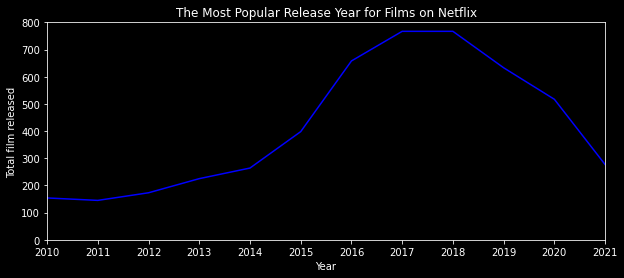

In [214]:
# Plotting
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# plot data
ax.plot(release_year2['release_year'], release_year2['count'], c='blue');

# customise
ax.set(title='The Most Popular Release Year for Films on Netflix',
       ylabel='Total film released',
       xlabel='Year')

# set the x interval to 3 year
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# set the x axis limit: 2010 to 2021
plt.xlim([2010, 2021])
plt.ylim([0, 800])

# remove the x margin
ax.margins(x=0)

### #2 What year Netflix added the most content to its platform?

In [215]:
df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [216]:
# change the values to date time
df['new_date'] = pd.to_datetime(df['date_added'])

# check the column
df['new_date'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: new_date, dtype: datetime64[ns]

In [217]:
# make a new column. Grab the year from the new_date column
df['date_added_year'] = df['new_date'].dt.year
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevi...",2021-09-25,2021.0


In [218]:
# group by the year and count
year_added = df['date_added_year'].value_counts().reset_index()
year_added.columns = ['date_added_year', 'count']
year_added

,date_added_year,count
0,2019.0,2016
1,2020.0,1879
2,2018.0,1649
3,2021.0,1498
4,2017.0,1188
5,2016.0,429
6,2015.0,82
7,2014.0,24
8,2011.0,13
9,2013.0,11


In [219]:
# change the data type
year_added['date_added_year'] = year_added['date_added_year'].astype('int64')
year_added

,date_added_year,count
0,2019,2016
1,2020,1879
2,2018,1649
3,2021,1498
4,2017,1188
5,2016,429
6,2015,82
7,2014,24
8,2011,13
9,2013,11


In [220]:
year_added_period = year_added.sort_values(by='date_added_year')
year_added_period.head(5)

,date_added_year,count
12,2008,2
11,2009,2
13,2010,1
8,2011,13
10,2012,3


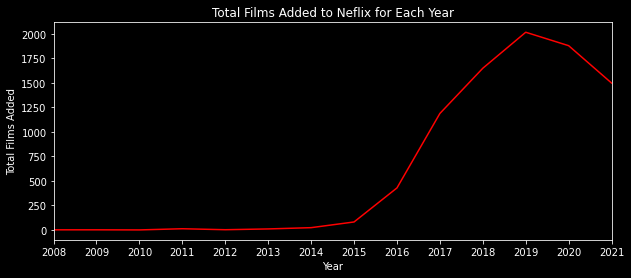

In [221]:
# Plotting
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# plot data
ax.plot(year_added_period['date_added_year'], year_added_period['count'], c='red');

# customise
ax.set(title='Total Films Added to Neflix for Each Year',
       ylabel='Total Films Added',
       xlabel='Year')

# set the x interval to 1
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# remove the x margin
ax.margins(x=0)

### #3 What is the most popular month to add new content?

In [222]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevi...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy ...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",2021-09-24,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",2021-09-24,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.",2021-09-24,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus...",2021-09-24,2021.0


In [223]:
# create month column
df['date_added_month'] = df['new_date'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   object        
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  new_date          8797 non-null   datetime64[ns]
 13  date_added_year   8797 non-null   float64       
 14  date_added_month  8797 n

In [224]:
# group by the month and count
month_added = df['date_added_month'].value_counts().reset_index()
month_added.columns = ['date_added_month', 'count']

month_added

,date_added_month,count
0,7.0,827
1,12.0,813
2,9.0,770
3,4.0,764
4,10.0,760
5,8.0,755
6,3.0,742
7,1.0,738
8,6.0,728
9,11.0,705


In [225]:
# change the data type
month_added.date_added_month = month_added.date_added_month.astype('int64')
month_added

,date_added_month,count
0,7,827
1,12,813
2,9,770
3,4,764
4,10,760
5,8,755
6,3,742
7,1,738
8,6,728
9,11,705


In [226]:
month_added_period = month_added.sort_values(by='date_added_month')
month_added_period

,date_added_month,count
7,1,738
11,2,563
6,3,742
3,4,764
10,5,632
8,6,728
0,7,827
5,8,755
2,9,770
4,10,760


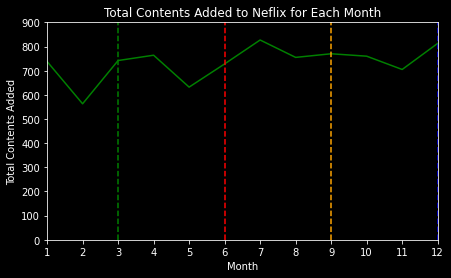

In [227]:
# Plotting
# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 4))

# plot data
ax.plot(month_added_period['date_added_month'], month_added_period['count'], c='green');

# customise
ax.set(title='Total Contents Added to Neflix for Each Month',
       ylabel='Total Contents Added',
       xlabel='Month')

# show all the x coordinate
plt.xticks(month_added_period['date_added_month'])

# set ylim
plt.ylim([0, 900])

# set vertical line
plt.axvline(x = 6, color = 'r', label = 'Summer Starts in the US', linestyle='--')
plt.axvline(x = 12, color = 'b', label = 'Winter Starts in the US', linestyle='--')
plt.axvline(x = 9, color = 'orange', label = 'Autumn Starts in the US', linestyle='--')
plt.axvline(x = 3, color = 'g', label = 'Spring Starts in the US', linestyle='--')

# remove the x margin
ax.margins(x=0)


### #4 What is the longest title of film within the dataset?

In [228]:
film.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevi...",1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to pr...",1
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral ...",1
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way for...,1
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović, Anna Fialová, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, Mélanie Fouch...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies","After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them.",1


In [229]:
# assign a new datafrane to work with
hey = film
hey.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevi...",1


In [230]:
# count the title length and assign it to a new column
hey['title_length'] = hey['title'].str.len()
hey.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14584\1624999324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hey['title_length'] = hey['title'].str.len()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count,title_length
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevi...",1,20
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to pr...",1,32
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral ...",1,7
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way for...,1,12
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović, Anna Fialová, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, Mélanie Fouch...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies","After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them.",1,12


Another way to count a string lenght is by using list comprehension with for loop

In [231]:
hey1 = film
hey1['title_length'] = [len(title) for title in film['title']]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14584\3701706759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hey1['title_length'] = [len(title) for title in film['title']]


In [232]:
# check
hey1.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count,title_length
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevi...",1,20


We can use either ways

In [233]:
# grab the longest title by sorting
top5_title_length = hey1.sort_values(['title_length'], ascending=False).head(5)
top5_title_length

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count,title_length
5164,s5165,Movie,"Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton",Chris Smith,Jim Carrey,"Canada, United States","November 17, 2017",2017,TV-MA,94 min,Documentaries,"Through the lens of his stunningly immersive performance as Andy Kaufman, Jim Carrey ponders the meaning of life, reality, identity and career.",1,104
8462,s8463,Movie,The Power of Grayskull: The Definitive History of He-Man and the Masters of the Universe,"Randall Lobb, Robert McCallum",NaN,"Canada, United States","August 24, 2018",2017,TV-14,96 min,Documentaries,"This colorful documentary explores the origins and impact of He-Man, a character whose power stretched well beyond a toy line and children's TV show.",1,88
3240,s3241,Movie,Mike Birbiglia: What I Should Have Said Was Nothing: Tales from My Secret Public Journal,NaN,Mike Birbiglia,United States,"November 22, 2019",2008,TV-MA,56 min,Stand-Up Comedy,Mike Birbiglia performs in this live concert special that features a riotous selection of the unique insights and observations culled from his diary.,1,88
4851,s4852,Movie,Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life,Marcus Raboy,"Steve Martin, Martin Short",United States,"May 25, 2018",2018,TV-14,74 min,Stand-Up Comedy,"Longtime pals and showbiz icons Steve Martin and Martin Short share countless quips, catchy tunes and hilarious stories about their lives in comedy.",1,83
3479,s3480,Movie,Cultivating the Seas: History and Future of the Full-Cycle Cultured Kindai Tuna,Mana Yasuda,NaN,NaN,"September 28, 2019",2019,TV-PG,45 min,"Documentaries, International Movies",An in-depth look at the full-cycle breeding program for bluefin Kindai tuna pioneered by Kinki University’s Aqua Culture Research Institute.,1,79


In [234]:
# grab only the title and the title length
top5_title_length[['title', 'title_length']]

,title,title_length
5164,"Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton",104
8462,The Power of Grayskull: The Definitive History of He-Man and the Masters of the Universe,88
3240,Mike Birbiglia: What I Should Have Said Was Nothing: Tales from My Secret Public Journal,88
4851,Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life,83
3479,Cultivating the Seas: History and Future of the Full-Cycle Cultured Kindai Tuna,79


In [235]:
# Grab the longest title using max
hey.title_length.max()

# get the row
longest_film_title = hey[hey['title_length'] == 104]

# get the title and title length
longest_film_title[['title', 'title_length']]

,title,title_length
5164,"Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton",104


In [236]:
# or we can use iloc indexing
top5_title_length.iloc[0][['title', 'title_length']]

title           Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton
title_length                                                                                                         104
Name: 5164, dtype: object

In [237]:
# or we can just grab the title
top5_title_length.iloc[0]['title']

'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'

### #5 Which actor shows up the most frequent in the dataset? 

In [238]:
# Increase the column width so we can see more information about the cast
pd.options.display.max_colwidth = 150

In [239]:
actor = df[['title', 'cast']]
actor = actor.dropna()
actor

,title,cast
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy ..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera"
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar"
5,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gis..."
6,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr"
...,...,...
8801,Zinzana,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, Mansoor Alfeeli, Ahd"
8802,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey Jr., Anthony Edwards, Brian Cox, Elias Koteas, Donal Logue, John Carroll Lynch, Dermot Mulroney, Chlo..."
8804,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf"
8805,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers"


In [240]:
cast_names = {}
for index, row in actor.iterrows():
    movie_cast = row['cast'] 
    movie_cast_split = movie_cast.split(',') # split all the values on comma
    movie_cast_strip = [name.strip().lower() for name in movie_cast_split] # remove all the white space(s) and use lowercase
    for name in movie_cast_strip:
        cast_names[name] = cast_names.get(name, 0) + 1

casted_actors = dict(sorted(cast_names.items(), key=lambda item: item[1], reverse=True))

# let's show the top 5
flag = 0
for keys, values in casted_actors.items():
    print(f"{keys.title()}, total casted: {values} times")
    flag += 1
    if flag == 5:
        break



Anupam Kher, total casted: 43 times
Shah Rukh Khan, total casted: 35 times
Julie Tejwani, total casted: 33 times
Naseeruddin Shah, total casted: 32 times
Takahiro Sakurai, total casted: 32 times


Another way to do it:

In [241]:
actor.head()

,title,cast
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy ..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera"
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar"
5,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gis..."
6,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr"


In [242]:
movie_cast2 = []
for index1, row1 in actor.iterrows():
    movie_cast2.append(row1['cast']) # append strings into movie_cast2 list

type(movie_cast2)
# No need to print the list because it will shows up all the values

list

In [243]:
# check the list
for z in movie_cast2:
    print(z)
    print(type(z))
    break

Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng
<class 'str'>


In [244]:
cast_list = []
for i in movie_cast2:
    string_strip_split = [_.strip() for _ in i.split(',')] # a list of string that has been splitted (delimiter comma) and stripped (white spaces)
    cast_list += string_strip_split # merge list

# turn cast_list into pandas series
count_actor = pd.Series(cast_list).value_counts()
count_actor


Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Length: 36439, dtype: int64

In [245]:
plot_top10_actor = count_actor.head(10)
plot_top10_actor

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
dtype: int64

Plot the actor data

In [246]:
# turn series into dataframe
top10_actor_df = pd.DataFrame(plot_top10_actor).reset_index()
top10_actor_df.columns = ['actor_name', 'count']

# show 
top10_actor_df

,actor_name,count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Paresh Rawal,28


Since I am more comfortable using dataframe, I think using this method is better

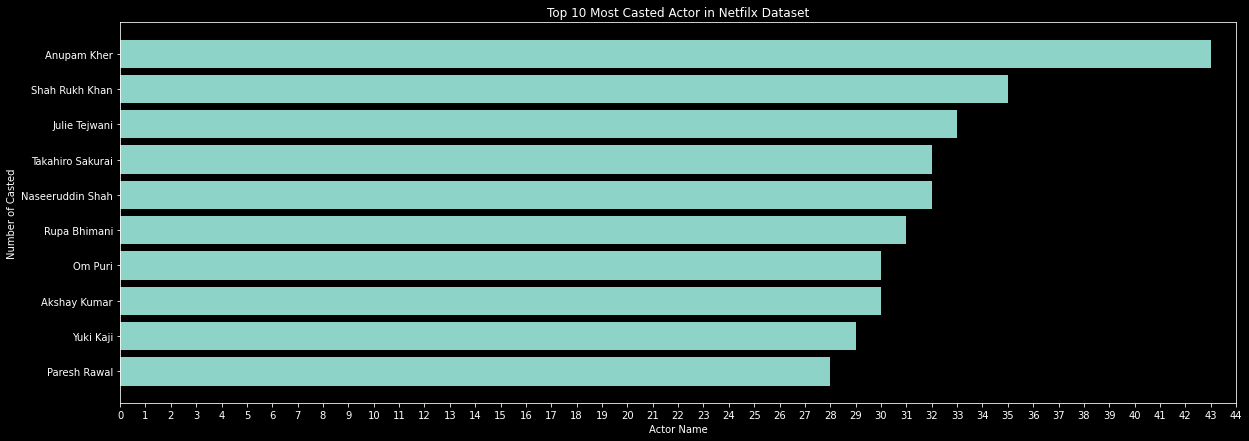

In [247]:
plot_actor = top10_actor_df.sort_values('count')

# plotting
fig, ax = plt.subplots(figsize=(20, 7))
ax.barh(plot_actor['actor_name'], plot_actor['count']);

# customise plot
ax.set(title="Top 10 Most Casted Actor in Netfilx Dataset",
      xlabel = 'Actor Name',
      ylabel = 'Number of Casted');

# set x interval to 1
count_interval = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(count_interval))

# Set xlim
plt.xlim([0, 44]);